# Detecting Fraudulent Bank Notes

<img src="http://i.dailymail.co.uk/i/pix/2011/01/17/article-1347979-0CCE3852000005DC-804_468x247.jpg"/>

We've all been hired by a bank to use machine learning and data science to determine if the bank notes they receive are real or not.

They've gone ahead and done a lot of the work for us, converting a training sample of bank notes into wavelet transformed samples. Each row in our data will have the following data:

1. variance of Wavelet Transformed image (continuous) 
2. skewness of Wavelet Transformed image (continuous) 
3. curtosis of Wavelet Transformed image (continuous) 
4. entropy of image (continuous) 
5. class (integer) 

It's up to us to use SVMs to try to predict genuine/not genuine.

[UCI Dataset](https://archive.ics.uci.edu/ml/datasets/banknote+authentication#)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [5]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt",
                   names=["Var","Skew","Kurt","Entropy","Genuine"])

In [6]:
data.head()

,Var,Skew,Kurt,Entropy,Genuine
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [40]:
X = data.ix[:,:-1]
y = data.ix[:,-1]

print X.shape

(1372, 4)


# Exercise begin!


1. Use Logistic regression to detect genuine vs nongenuine bank notes. How does it perform in and out of sample?
2. Use SVM classifier to detect genuine vs nongenuine bank notes. Incorporate CV through grid search if you would like. Discuss your findings and thoughts with a partner.



## Helpful Notes:
1. If you try to fit and test on the entire dataset, you might get a 100% score.
2. Try using cross validation to see the performance out of sample
3. If this still confuses you, don't use all the features and/or try using a linear kernel.
4. Try plotting scatters of the features to see why (i.e. maybe there's already a linear hyperplane we can use without needing to use kernels). The scatters might shed light onto why a linear kernel might have a harder time.

In [38]:
# Logistic Regression
from sklearn import linear_model
model = linear_model.LogisticRegressionCV()
model.fit(X,y)
model.score(X,y) 

0.99052478134110788

In [41]:
from sklearn import svm

In [42]:
model = svm.SVC()
model.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [43]:
model.score(X,y)

1.0

In [44]:
model.n_support_

array([133, 110], dtype=int32)

In [45]:
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
from sklearn.cross_validation import StratifiedKFold

In [50]:
#cross_val_score(model,X,y,cv=KFold(len(X),n_folds=5,shuffle=True))
cross_val_score(model,X,y,cv=KFold(len(X),n_folds=5,shuffle=True))

array([ 1.,  1.,  1.,  1.,  1.])

In [51]:
from itertools import combinations

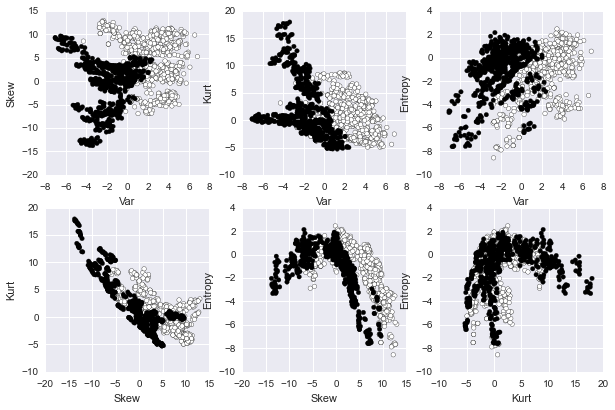

In [25]:
plt.figure(figsize=(10,10))

for idx, (x1,x2) in enumerate(combinations(data.columns[:-1],2)):
    plt.subplot(3,3,idx+1)
    plt.scatter( data.ix[:,x1],data.ix[:,x2],c=data.Genuine)
    plt.xlabel(x1),plt.ylabel(x2)

# RBF vs Linear Kernel

In [52]:
X = data.ix[:,1:3]
y = data.ix[:,-1] 

In [72]:
model = svm.SVC(kernel="rbf",gamma=.0001)
model.fit(X,y)
model.score(X,y)

0.73177842565597673

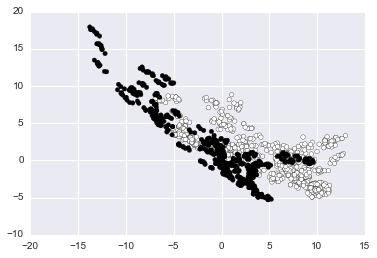

In [73]:
plt.scatter(X.ix[:,0],X.ix[:,1],c=y)

In [74]:
x_min, x_max = X.ix[:, 0].min() - 1, X.ix[:, 0].max() + 1
y_min, y_max = X.ix[:, 1].min() - 1, X.ix[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

In [75]:
zz = model.predict(np.c_[xx.ravel(),yy.ravel()])

<matplotlib.contour.QuadContourSet instance at 0x10fd407a0>

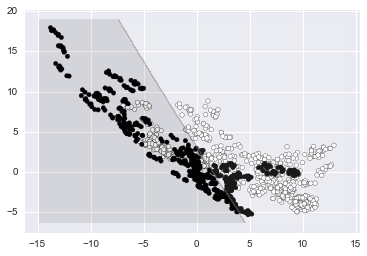

In [76]:
plt.scatter(X.ix[:,0],X.ix[:,1],c=y)
plt.contourf(xx,yy, zz.reshape(xx.shape),alpha=.1)